# **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add,Dropout,BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


(60000, 28, 28)


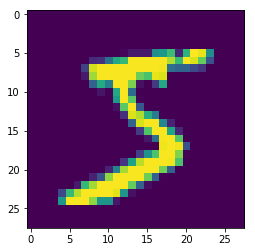

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

# Vanilla Network.

In [10]:
from keras.layers import Activation
model = Sequential()

model.add(Convolution2D(32, (3, 3), activation='relu', input_shape=(28,28,1))) # 28
model.add(Convolution2D(64, (3, 3), activation='relu')) # 26 
model.add(Convolution2D(32, 1, activation='relu')) # 26
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(32, (3, 3), activation='relu')) # 11
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(32, (3, 3), activation='relu')) # 9
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(Convolution2D(10, 1))

model.add(Flatten())
model.add(Activation('softmax'))

W0814 18:27:05.050798 140644614076288 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0814 18:27:05.089177 140644614076288 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0814 18:27:05.095760 140644614076288 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0814 18:27:05.149190 140644614076288 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 32)        2080      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 32)          9248      
__________

In [12]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

W0814 18:27:14.063277 140644614076288 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0814 18:27:14.094885 140644614076288 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [13]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.
W0814 18:27:16.734807 140644614076288 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0814 18:27:16.911584 140644614076288 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/10
60000/60000 [==============================] - 18s 300us/step - loss: 0.1475 - acc: 0.9540
Epoch 2/10
60000/60000 [==============================] - 11s 183us/step - loss: 0.0503 - acc: 0.9842
Epoch 3/10
60000/60000 [==============================] - 11s 179us/step - loss: 0.0375 - acc: 0.9891
Epoch 4/10
60000/60000 [==============================] - 11s 175us/step - loss: 0.0291 - acc: 0.9912
Epoch 5/10
60000/60000 [==============================] - 11s 176us/step - loss: 0.0249 - acc: 0.9920
Epoch 6/10
60000/60000 [==============================] - 11s 176us/step - loss: 0.0208 - acc: 0.9930
Epoch 7/10
60000/60000 [==============================] - 11s 175us/step - loss: 0.0180 - acc: 0.9941
Epoch 8/10
60000/60000 [==============================] - 10s 174us/step - loss: 0.0154 - acc: 0.9950
Epoch 9/10
60000/60000 [==============================] - 10s 175us/step - loss: 0.0137 - acc: 0.9954
Epoch 10/10
60000/60000 [==============================] - 10s 174us/step - loss: 

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [15]:
print(score)

[0.027804834945105904, 0.9922]


In [0]:
y_pred = model.predict(X_test)

In [17]:
print(y_pred[:9])
print(y_test[:9])

[[4.27672229e-15 2.55472021e-09 7.39618866e-10 4.45712564e-11
  2.44306761e-07 2.84517028e-11 2.22641472e-16 9.99997139e-01
  4.12740710e-11 2.63670449e-06]
 [3.73482623e-09 9.88576403e-07 9.99998808e-01 8.02897837e-09
  1.49471564e-08 9.87151306e-14 1.26862801e-07 4.86266813e-08
  2.00706403e-08 1.79948406e-12]
 [5.16342737e-08 9.99978304e-01 2.93628909e-06 2.32983272e-10
  1.44822679e-05 3.13317685e-07 4.74139370e-07 3.15101033e-06
  5.88106026e-08 2.13179675e-07]
 [9.99999046e-01 3.17802257e-10 8.74524508e-10 1.24590373e-11
  6.46415088e-10 9.39780587e-10 3.87111157e-07 4.62548611e-10
  5.71808755e-07 1.08563745e-08]
 [1.16488468e-11 3.71586130e-11 4.69358601e-13 1.88449909e-13
  9.99942541e-01 6.42248088e-10 7.20044246e-10 1.98675052e-11
  1.69076941e-09 5.74820187e-05]
 [3.64357589e-09 9.99991894e-01 9.33033050e-07 2.29102544e-12
  6.83651251e-06 7.02556147e-09 5.67398963e-08 2.90958411e-07
  4.54915217e-09 1.29027748e-08]
 [2.86335738e-21 4.62018336e-13 2.24403897e-14 2.37767442e

# Second Code
 In this code there is addition of :
 * Addition of Batch Normalization.
 * Change in number of channels. 
 * Batch size increased to 64
 

In [0]:
model_2=Sequential()

In [19]:
# Network 2

model_2.add(Convolution2D(10,3,3,activation='relu',input_shape=(28,28,1))) #26
model_2.add(BatchNormalization())

model_2.add(Convolution2D(16,3,3,activation='relu'))
model_2.add(BatchNormalization())

model_2.add(Convolution2D(32,3,3,activation='relu')) 
model_2.add(BatchNormalization())

model_2.add(MaxPooling2D(2,2)) #12

model_2.add(Convolution2D(10,1,1,activation='relu')) #12
model_2.add(BatchNormalization())

model_2.add(Convolution2D(16,3,3,activation='relu')) 
model_2.add(BatchNormalization())

model_2.add(Convolution2D(32,3,3,activation='relu')) #10
model_2.add(BatchNormalization())

model_2.add(Convolution2D(10,1,1,activation='relu')) #5
model_2.add(Convolution2D(10,7))

model_2.add(Flatten())
model_2.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  
W0814 18:45:05.924629 140644614076288 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:1834: The name tf.nn.fused_batch_norm is deprecated. Please use tf.compat.v1.nn.fused_batch_norm instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-package

In [20]:
model_2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 10)        100       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 10)        40        
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 24, 24, 16)        1456      
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 16)        64        
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 22, 22, 32)        4640      
_________________________________________________________________
batch_normalization_3 (Batch (None, 22, 22, 32)        128       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 11, 11, 32)        0         
__________

In [0]:
model_2.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [22]:
model_2.fit(X_train, Y_train, batch_size=64, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 11s 179us/step - loss: 0.1551 - acc: 0.9517
Epoch 2/10
60000/60000 [==============================] - 9s 157us/step - loss: 0.0492 - acc: 0.9850
Epoch 3/10
60000/60000 [==============================] - 9s 158us/step - loss: 0.0379 - acc: 0.9881
Epoch 4/10
60000/60000 [==============================] - 10s 160us/step - loss: 0.0297 - acc: 0.9903
Epoch 5/10
60000/60000 [==============================] - 10s 160us/step - loss: 0.0248 - acc: 0.9922
Epoch 6/10
60000/60000 [==============================] - 9s 158us/step - loss: 0.0230 - acc: 0.9921
Epoch 7/10
60000/60000 [==============================] - 9s 158us/step - loss: 0.0186 - acc: 0.9938
Epoch 8/10
60000/60000 [==============================] - 9s 158us/step - loss: 0.0188 - acc: 0.9936
Epoch 9/10
60000/60000 [==============================] - 9s 156us/step - loss: 0.0159 - acc: 0.9950
Epoch 10/10
60000/60000 [==============================] - 9s 156us/step - loss: 0.0133 

In [0]:
score_2 = model_2.evaluate(X_test, Y_test, verbose=0)

In [25]:
print(score_2)

[0.034738795965200915, 0.9899]


# Observations :
* The number of parameters dropped to 18k and the Accuracy of model is 98.99% after 10 epochs.

# Third Code

* Addition of Dropout layers.
*  Using SGD optimizer. 

In [27]:
model_3=Sequential()

model_3.add(Convolution2D(8,3,3,activation='relu',input_shape=(28,28,1)))
model_3.add(BatchNormalization())
model_3.add(Convolution2D(16,3,3,activation='relu'))
model_3.add(BatchNormalization())
model_3.add(Convolution2D(32,3,3,activation='relu'))
model_3.add(BatchNormalization())

model_3.add(Dropout(0.1))

model_3.add(MaxPooling2D(2,2))
model_3.add(Convolution2D(8,1,1,activation='relu'))
model_3.add(BatchNormalization())


model_3.add(Convolution2D(16,3,3,activation='relu'))
model_3.add(BatchNormalization())
model_3.add(Convolution2D(32,3,3,activation='relu'))
model_3.add(BatchNormalization())

model_3.add(Convolution2D(10,1,1,activation='relu'))
model_3.add(BatchNormalization())
model_3.add(Convolution2D(10,3,3,activation='relu'))
model_3.add(BatchNormalization())

model_3.add(Convolution2D(10,5))
model_3.add(BatchNormalization())

model_3.add(Flatten())

model_3.add(Activation('softmax'))



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  import sys
W0814 18:52:24.607777 140644614076288 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
/us

In [28]:
model_3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 26, 26, 8)         80        
_________________________________________________________________
batch_normalization_7 (Batch (None, 26, 26, 8)         32        
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 24, 24, 16)        1168      
_________________________________________________________________
batch_normalization_8 (Batch (None, 24, 24, 16)        64        
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 22, 22, 32)        4640      
_________________________________________________________________
batch_normalization_9 (Batch (None, 22, 22, 32)        128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 22, 22, 32)        0         
__________

In [0]:
model_3.compile(loss='categorical_crossentropy',
             optimizer='SGD',
             metrics=['accuracy'])

In [31]:
model_3.fit(X_train,Y_train,batch_size=64,epochs=10,verbose=1)

Epoch 1/10
60000/60000 [==============================] - 10s 172us/step - loss: 0.1813 - acc: 0.9681
Epoch 2/10
60000/60000 [==============================] - 10s 169us/step - loss: 0.1440 - acc: 0.9729
Epoch 3/10
60000/60000 [==============================] - 10s 167us/step - loss: 0.1200 - acc: 0.9770
Epoch 4/10
60000/60000 [==============================] - 10s 166us/step - loss: 0.1085 - acc: 0.9790
Epoch 5/10
60000/60000 [==============================] - 10s 166us/step - loss: 0.0945 - acc: 0.9811
Epoch 6/10
60000/60000 [==============================] - 10s 167us/step - loss: 0.0876 - acc: 0.9815
Epoch 7/10
60000/60000 [==============================] - 10s 167us/step - loss: 0.0782 - acc: 0.9839
Epoch 8/10
60000/60000 [==============================] - 10s 167us/step - loss: 0.0724 - acc: 0.9847
Epoch 9/10
60000/60000 [==============================] - 10s 166us/step - loss: 0.0702 - acc: 0.9847
Epoch 10/10
60000/60000 [==============================] - 10s 166us/step - loss: 

In [32]:
model_3.fit(X_train,Y_train,batch_size=64,epochs=5,verbose=1)

Epoch 1/5
60000/60000 [==============================] - 10s 168us/step - loss: 0.0611 - acc: 0.9868
Epoch 2/5
60000/60000 [==============================] - 10s 171us/step - loss: 0.0572 - acc: 0.9876
Epoch 3/5
60000/60000 [==============================] - 11s 179us/step - loss: 0.0548 - acc: 0.9876
Epoch 4/5
60000/60000 [==============================] - 10s 171us/step - loss: 0.0528 - acc: 0.9885
Epoch 5/5
60000/60000 [==============================] - 10s 166us/step - loss: 0.0519 - acc: 0.9881


In [34]:
model_3.fit(X_train,Y_train,batch_size=64,epochs=10,verbose=1)

Epoch 1/10
60000/60000 [==============================] - 10s 167us/step - loss: 0.0495 - acc: 0.9888
Epoch 2/10
60000/60000 [==============================] - 10s 165us/step - loss: 0.0469 - acc: 0.9897
Epoch 3/10
60000/60000 [==============================] - 10s 165us/step - loss: 0.0452 - acc: 0.9899
Epoch 4/10
60000/60000 [==============================] - 10s 166us/step - loss: 0.0431 - acc: 0.9902
Epoch 5/10
60000/60000 [==============================] - 10s 166us/step - loss: 0.0422 - acc: 0.9906
Epoch 6/10
60000/60000 [==============================] - 10s 169us/step - loss: 0.0419 - acc: 0.9904
Epoch 7/10
60000/60000 [==============================] - 10s 167us/step - loss: 0.0387 - acc: 0.9918
Epoch 8/10
60000/60000 [==============================] - 10s 166us/step - loss: 0.0381 - acc: 0.9914
Epoch 9/10
60000/60000 [==============================] - 10s 166us/step - loss: 0.0365 - acc: 0.9916
Epoch 10/10
60000/60000 [==============================] - 10s 168us/step - loss: 

In [35]:
model_3.evaluate(X_test, Y_test, verbose=0)

[0.031014357667788862, 0.9921]

# Observations 
 The number of parameters have been reduced to 16k, the model was trained for 25 epochs to see if there wil be a case of overfitting the model even after the addition of Dropout layers. The resulting Vacc is 99.21% and the model did not overfit.  

# Fourth code
* Addition of Dropout after every layer & increase batch size to 128.
* Using scheduler to change the learning rate for every epoch.
* Introducing calbacks.

In [48]:
model_4=Sequential()

model_4.add(Convolution2D(10,3,3,activation='relu',input_shape=(28,28,1)))
model_4.add(BatchNormalization())
model_4.add(Dropout(0.1))
model_4.add(Convolution2D(16,3,3,activation='relu'))
model_4.add(BatchNormalization())

model_4.add(Dropout(0.1))

model_4.add(Convolution2D(10,1,1,activation='relu'))
model_4.add(MaxPooling2D(2,2))

model_4.add(Convolution2D(16,3,3,activation='relu'))
model_4.add(BatchNormalization())
model_4.add(Dropout(0.1))

model_4.add(Convolution2D(32,3,3,activation='relu'))
model_4.add(BatchNormalization())
model_4.add(Dropout(0.1))

model_4.add(Convolution2D(10,1,1,activation='relu'))
model_4.add(BatchNormalization())
model_4.add(Dropout(0.1))

model_4.add(Convolution2D(16,3,3,activation='relu'))
model_4.add(BatchNormalization())
model_4.add(Dropout(0.1))

model_4.add(MaxPooling2D(2,2))

model_4.add(Dropout(0.1))

model_4.add(Convolution2D(10,3,3))

model_4.add(Flatten())

model_4.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
/usr/loca

In [49]:
model_4.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 26, 26, 10)        100       
_________________________________________________________________
batch_normalization_22 (Batc (None, 26, 26, 10)        40        
_________________________________________________________________
dropout_9 (Dropout)          (None, 26, 26, 10)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 24, 24, 16)        1456      
_________________________________________________________________
batch_normalization_23 (Batc (None, 24, 24, 16)        64        
_________________________________________________________________
dropout_10 (Dropout)         (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 24, 24, 10)        170       
__________

In [0]:
model_4.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [0]:
from keras.callbacks import LearningRateScheduler

In [0]:
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

In [53]:
model_4.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1, validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
60000/60000 [==============================] - 9s 152us/step - loss: 0.2634 - acc: 0.9175 - val_loss: 0.0587 - val_acc: 0.9804
Epoch 2/20

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
60000/60000 [==============================] - 6s 103us/step - loss: 0.0845 - acc: 0.9736 - val_loss: 0.0442 - val_acc: 0.9855
Epoch 3/20

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
60000/60000 [==============================] - 6s 102us/step - loss: 0.0671 - acc: 0.9790 - val_loss: 0.0382 - val_acc: 0.9875
Epoch 4/20

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
60000/60000 [==============================] - 6s 103us/step - loss: 0.0577 - acc: 0.9823 - val_loss: 0.0371 - val_acc: 0.9877
Epoch 5/20

Epoch 00005: LearningRateScheduler setting learning rate to 0.0013181019.
60000/60000 [======

# Observations

The number of parameters to 11k, the addition of scheduler which changed the learning rate at every iteration, help reach 99.36% Vacc at 19th epoch which took the previous (3rd) 25 epochs to reach 99.21% Vacc. 

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [25]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()

KeyError: ignored